In [1]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'plotly'

In [59]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.random.randn()
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    print(target, prediction)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

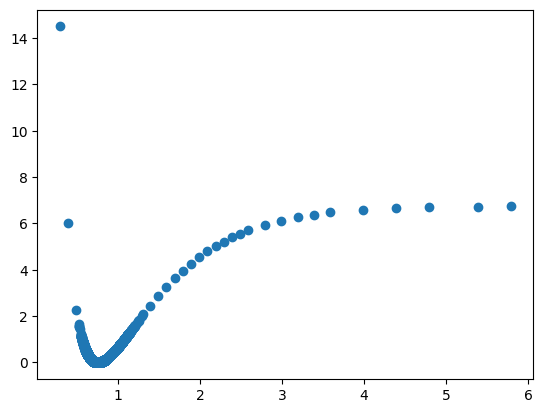

In [63]:
fulldata = np.loadtxt('dists-energies/combineddata.dat')
fullx = fulldata.T[0]
fully = fulldata.T[1]
zero=np.min(fully)
fully=fully-zero
plt.scatter(fullx, fully)
#zero=fully[-1]
# manipulate data like minmax
fullynew = fully
fullxnew = fullx
#scaling
scaley=np.max(fullynew)
scalex=np.max(fullxnew)
fullynew=fullynew/scaley
fullxnew=fullxnew/scalex

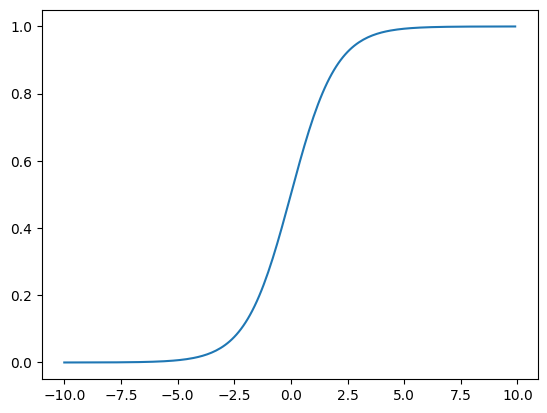

In [64]:
xgrid=np.arange(-10,10,0.1)
a=[1/(1 + np.exp(-x)) for x in xgrid]
plt.plot(xgrid, a)
plt.show()

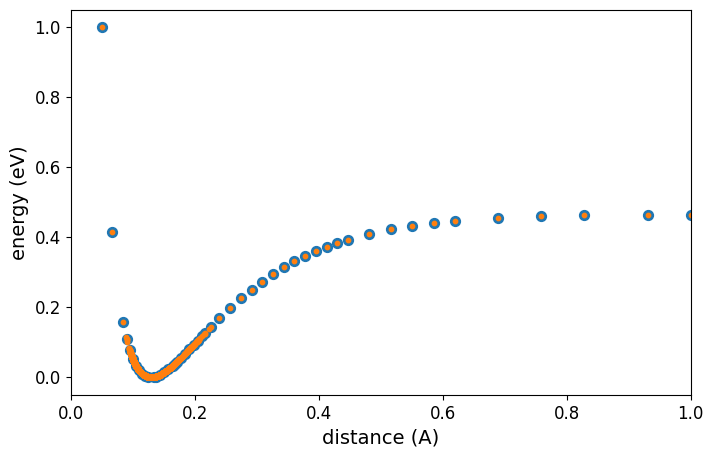

In [71]:
def simple_fps(datax, nsamples):
    n=len(datax)
    distances=np.zeros(n)
    sampled=np.zeros((nsamples,), dtype=int)
    distances[:]=1e10
    index=np.random.choice(1, 1, replace=False)
    sampled[0]=index
    for i in range(nsamples):
        for j in range(n):
            dist=np.abs(datax[j]-datax[index])
            if dist <= distances[j]:
                distances[j]=dist
        index=np.argmax(distances)
        # print(index)
        sampled[i]=index
    return sampled

nsamples = 50
# Check if nsamples is not greater than the length of the array
if nsamples > len(fullxnew):
    raise ValueError("nsamples cannot be greater than the length of the array.")
# Call fps
indices = simple_fps(fullxnew, nsamples)
# print(indices)
# Select items from your array using these indices
selected_x_fps = fullxnew[indices]
selected_y_fps = fullynew[indices]
#x_values = np.array([0, 0.3, 1, 3.1, 4.7])
#y_values = np.array([1, 0, 1.4, 0, -0.9])
x_values=selected_x_fps
y_values=selected_y_fps
plt.figure(figsize=(8, 5))
plt.xlim([0.0,1])
plt.ylabel('energy (eV)', fontsize=14)
plt.xlabel('distance (A)', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.scatter(x_values, y_values, marker='o', s=50)
plt.scatter(fullxnew, fullynew, marker='o', s=10)
plt.show()

In [72]:
input_vectors = selected_x_fps[:np.newaxis]
targets = selected_y_fps[:np.newaxis]
#print(input_vectors, targets)

In [73]:
learning_rate = 0.1
epochs=40000
neural_network1 = NeuralNetwork(learning_rate)
training_error_lr1 = neural_network1.train(input_vectors, targets, epochs)
learning_rate = 0.05
neural_network2 = NeuralNetwork(learning_rate)
training_error_lr2 = neural_network2.train(input_vectors, targets, epochs)
learning_rate = 0.01
neural_network3 = NeuralNetwork(learning_rate)
training_error_lr3 = neural_network3.train(input_vectors, targets, epochs)

0.46432825370350145 0.7350439706562225
0.4325062541853441 0.6753246248293622
0.45994238982144287 0.7037647165535752
0.31349871943980884 0.6455294902418665
0.3932262842190236 0.6605859730253943
0.16829259336467348 0.6301791302339612
1.0 0.6013641738793342
0.46407574747367275 0.7263255145879587
0.4626712010965458 0.7129178105233037
0.45475711592616613 0.6944448742969354
0.4463685862211137 0.6849630807219527
0.06775123489940858 0.6219558834481069
0.3600079073349252 0.6530960194452745
0.2502315493770982 0.6378894543007834
0.10890980698976022 0.607543225099272
0.44030297072697844 0.6801630858276189
0.4225013985296217 0.6704484353603432
0.409652391665749 0.6655352853892583
0.02261501741978901 0.6178076678557793
0.11717255205544011 0.6259608169393543
0.019729354094212333 0.6105969589592453
0.38341414965873954 0.6580980135439456
0.3723831850572078 0.6556013263026791
0.34615851133639025 0.6505822029591428
0.3307002090962735 0.6480599886706022
0.29442625611648926 0.6429908231707935
0.27336677155

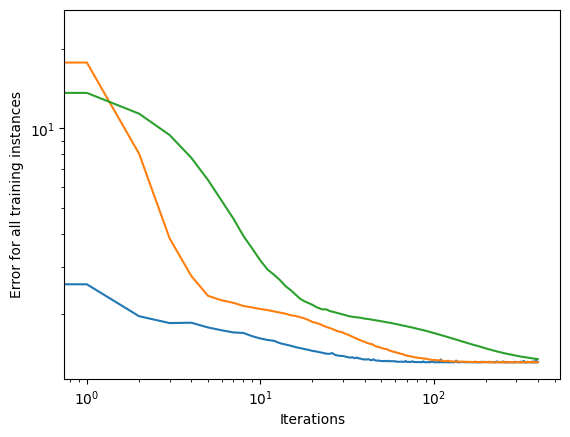

In [74]:
plt.plot(training_error_lr1)
plt.plot(training_error_lr2)
plt.plot(training_error_lr3)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.yscale('log')
plt.xscale('log')
#plt.xlim(2, 100)
#plt.ylim(0,90000)
plt.show()

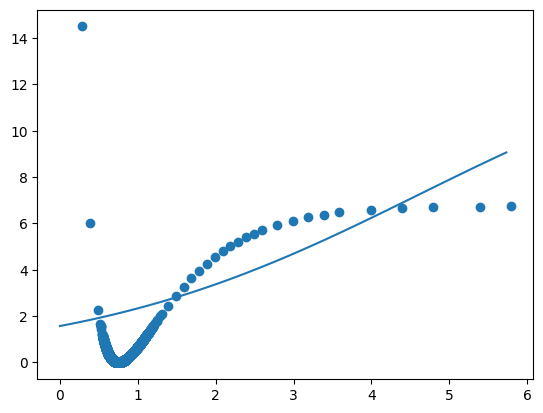

In [75]:
xgrid=np.arange(0,1,0.01)
ypredict=neural_network1.predict(xgrid)
xgrid=xgrid*scalex
ypredict=ypredict*scaley
plt.plot(xgrid,ypredict)
plt.scatter(fullx, fully)
plt.show()